In [2]:
import numpy as np
import matplotlib as mpl
mpl.use('Agg')

import geopandas as gpd
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from cartopy.io.img_tiles import Stamen
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
from matplotlib.patches import Circle

from matplotlib import gridspec
import time 
import scipy.stats as stats
from scipy.stats import kstest, cramervonmises
import tensorflow as tf
import tensorflow_probability as tfp
from pingouin import partial_corr

from demo import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Myriad Pro'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

coastline = gpd.read_file('/home/mizu_home/xp53/nas_home/coastlines-split-SGregion/lines.shp')
mask = np.loadtxt('mask.txt')

ipcc_blue = (112.0/255, 160.0/255, 205.0/255, 1.0)
ipcc_orange = (196.0/255, 121.0/255, 0.0/255, 1.0)

lonlat = np.loadtxt('data/lonlat.txt')
lon = lonlat[0, :].reshape([120, 160])
lat = lonlat[1, :].reshape([120, 160])


2024-06-06 09:53:24.512818: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 09:53:24.599334: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


/home/mizu_home/xp53/.conda/envs/wrfplot/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'color'
  result = super().contourf(*args, **kwargs)


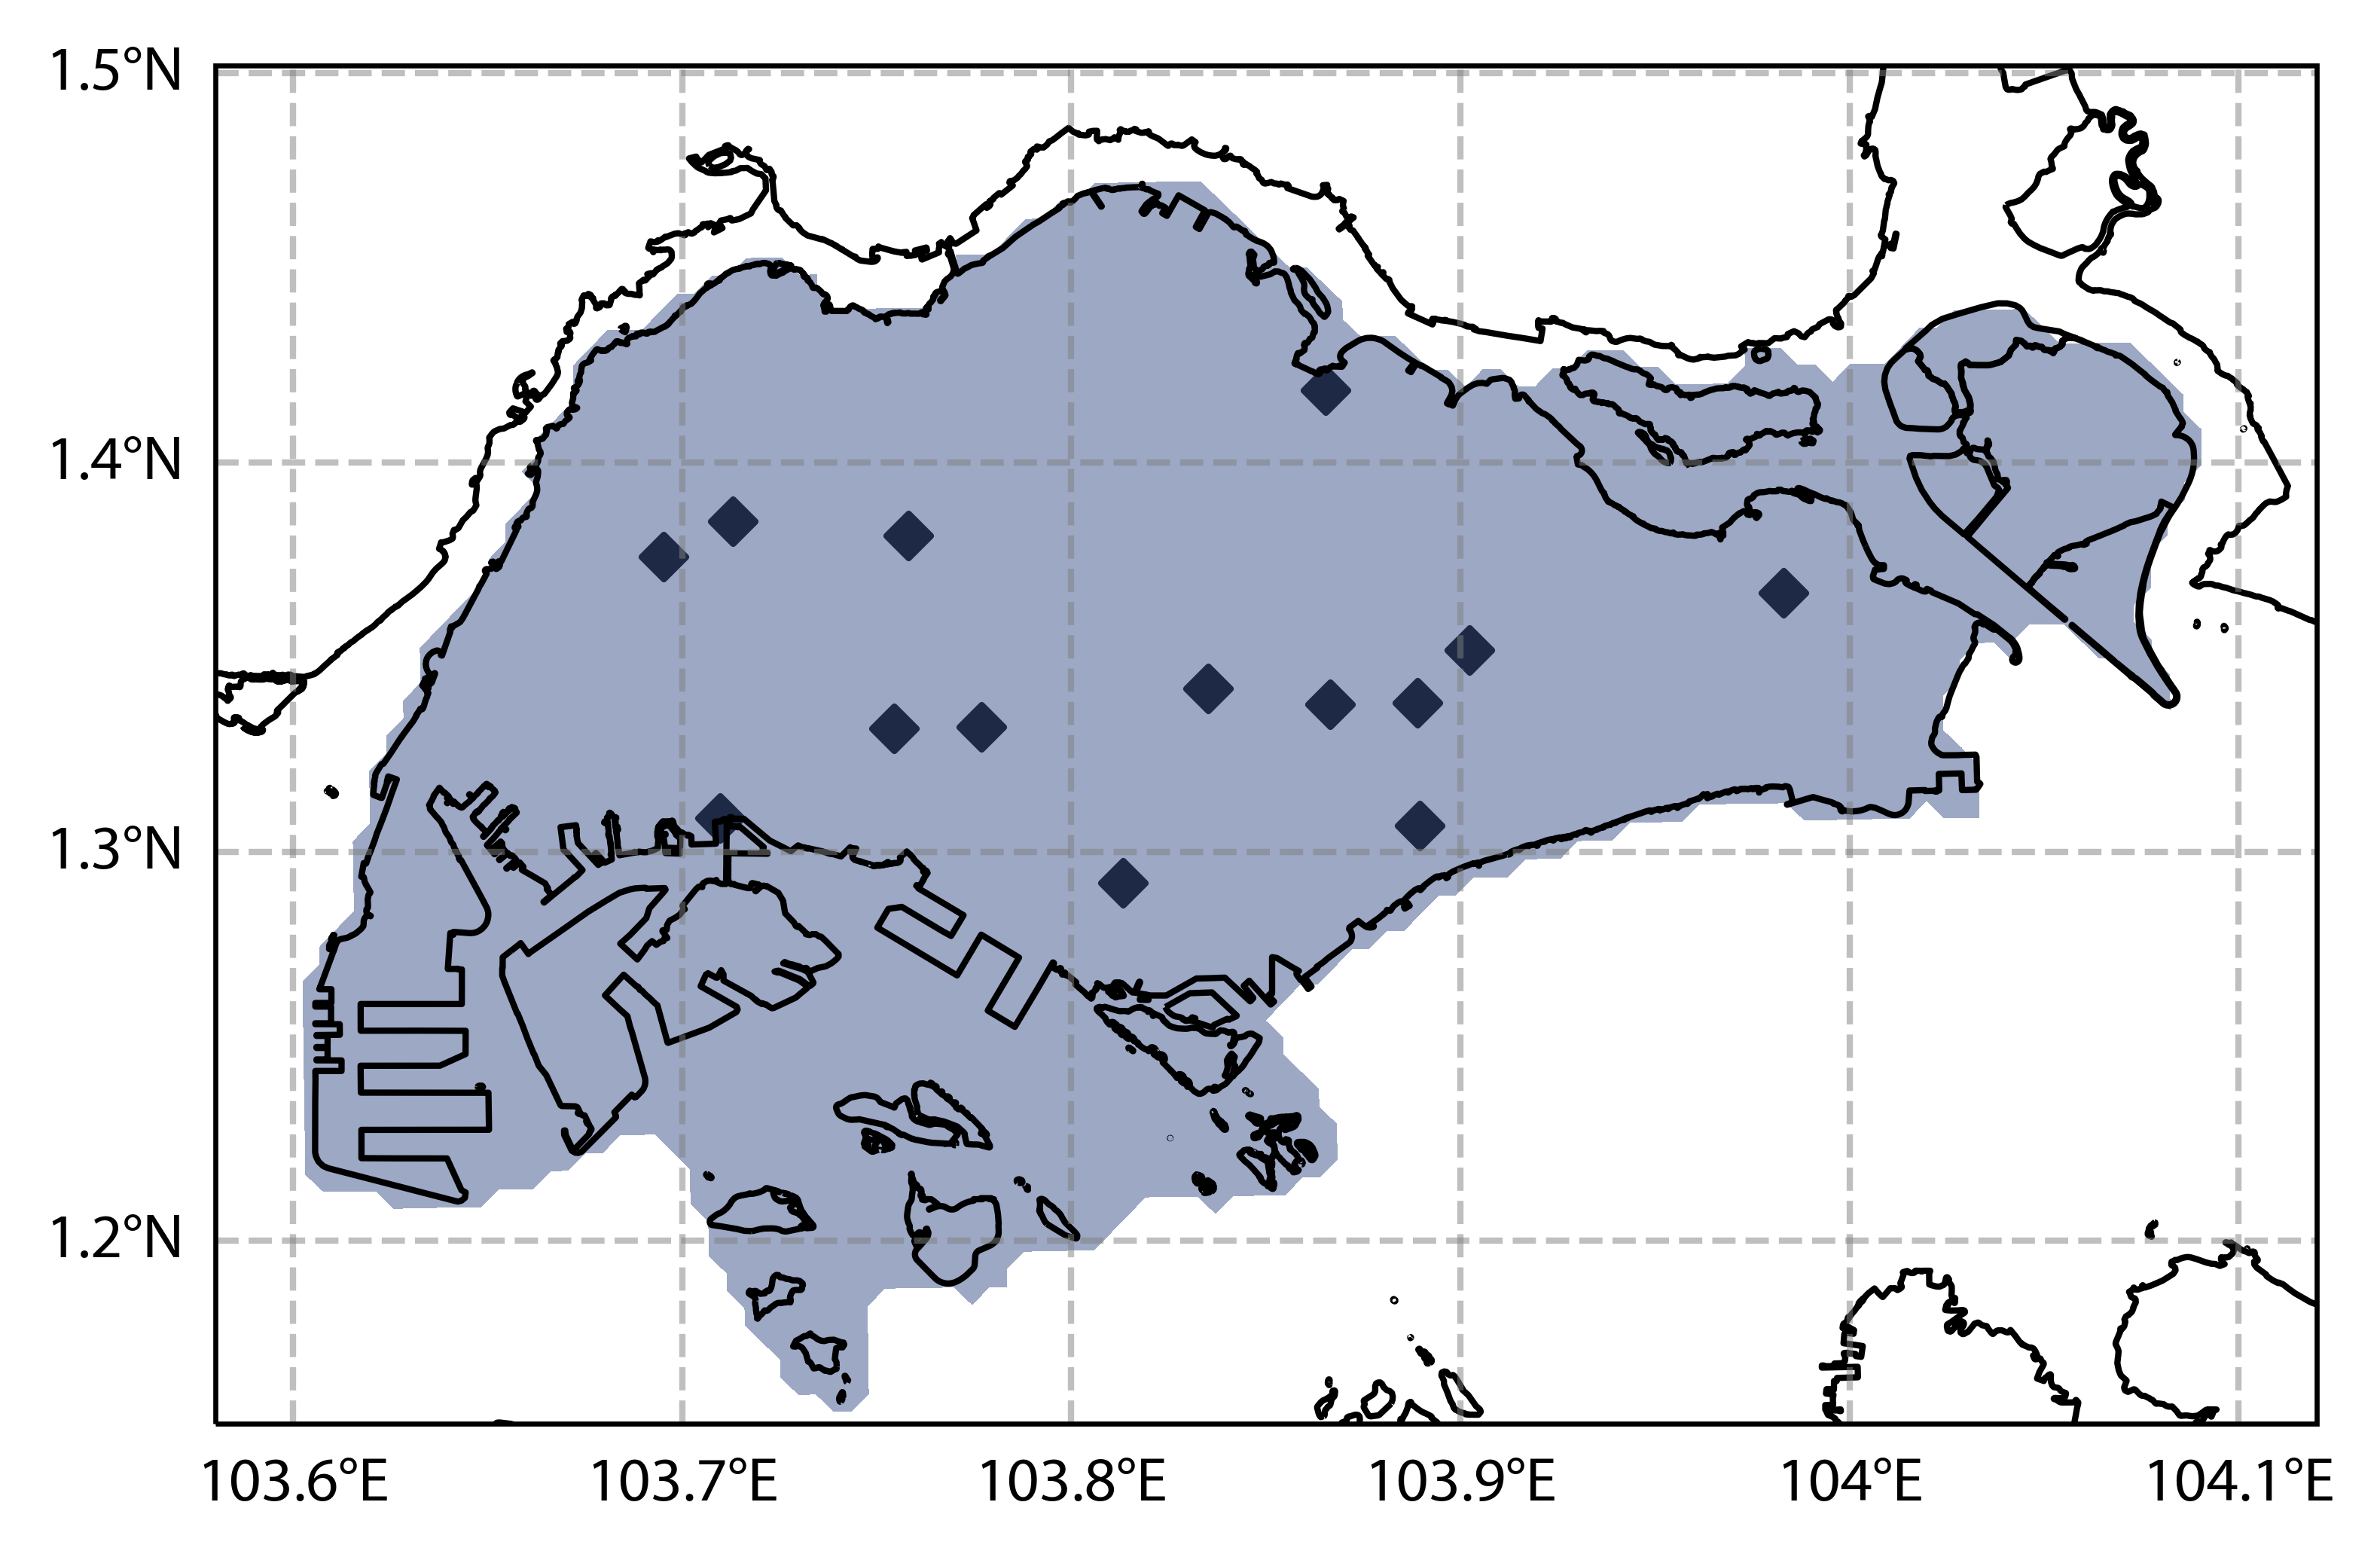

In [6]:
wrf_loc = np.loadtxt('data/wrf_loc.csv')[:, 2:]
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=[6, 4], subplot_kw={'projection': crs.PlateCarree()})
coastline.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
sta_map = ax.scatter(wrf_loc[:,0], wrf_loc[:,1], s = 25, facecolors='k', marker='D')

basemap = ax.contourf(lon, lat, mask,  transform=crs.PlateCarree(), alpha=0.5, color='red')
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator([103.5, 103.6, 103.7, 103.8, 103.9, 104.0, 104.1])
gl.ylocator = mticker.FixedLocator([1.1, 1.2, 1.3, 1.4, 1.5])
ax.set_extent([103.58, 104.12, 1.153, 1.502], crs=crs.PlateCarree())
fig.savefig('figures_new/sg_domain.pdf')